In [1]:
import numpy as np
from Instruments.Keithley_2612B import Keithley_2612B
from Instruments.Agilent_E3631A import Agilent_E3631A 

# DC sources objects
SMU_ring1 = Keithley_2612B(25, 'a')
SMU_ring2 = Keithley_2612B(25, 'b')

# DC objects
DC_ring1 = Agilent_E3631A(1, '6')
DC_ring2 = Agilent_E3631A(5, '6')

SMU_ring1.connect()
SMU_ring2.connect()
DC_ring1.connect()
DC_ring2.connect()

In [3]:
SMU_ring1.output_off()
SMU_ring2.output_off()
DC_ring1.output_off()
DC_ring2.output_off()

1:04 PM : Alignment using OSA

In [39]:
import time

# Set the rings reverse bias to 2V
SMU_ring1.source_voltage(0)
SMU_ring2.source_voltage(0)
SMU_ring1.output_on()
SMU_ring2.output_on()
# Set the heaters bias to 0
DC_ring1.source_voltage(0)
DC_ring2.source_voltage(0)

In [51]:
#Tuning of ring 1
DC_ring1.source_voltage(0)
DC_ring2.source_voltage(0)
for i in np.linspace(3.,4.,100):
    time.sleep(1)
    DC_ring1.source_voltage(i)
    
# Maximum ER
#DC_ring1.source_voltage(3.3)

In [40]:
#Tuning of ring 2
for i in np.linspace(2.,4.,40):
    time.sleep(1)
    DC_ring2.source_voltage(i)

In [36]:
DC_ring1.source_voltage(0)
for i in np.linspace(2.,4.,40):
    time.sleep(1)
    SMU_ring1.source_voltage(i)

KeyboardInterrupt: 

In [80]:
SMU_ring1.output_on()
DC_ring1.source_voltage(0)
for i in np.linspace(0.,6.,100):
    time.sleep(1)
    SMU_ring2.source_voltage(i)

In [4]:
print(DC_ring1.measure_power())

-3.83476935496e-07


This sweep is used to test applying bias and measuring the electrical power applied to the phaser.

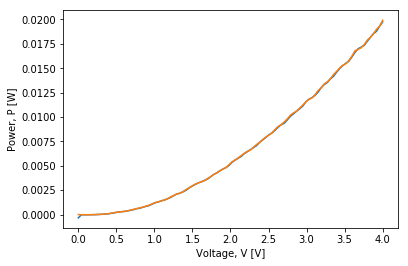

13.9879999161


In [13]:
import time
import matplotlib.pyplot as plt

DC_ring1.display_on()

V = np.linspace(0.,4.,100)
P = []
R = []
for v in V:
    DC_ring1.source_voltage(v)
    P.append(DC_ring1.measure_power())
    R.append(DC_ring1.measure_voltage()/DC_ring1.measure_current())
plt.plot(V, P)
plt.plot(V, V**2/R)
plt.xlabel('Voltage, V [V]')
plt.ylabel('Power, P [W]')
plt.show()

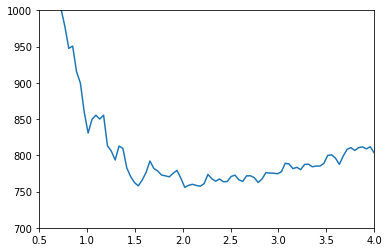

In [14]:
plt.plot(V, R)
plt.xlim(0.5,4.)
plt.ylim(700.,1000)
plt.show()